# Lesson 4: Mastering K-means Clustering: Selection of Clusters and Centroid Initialization


Greetings! Our journey into K-means clustering deepens as we explore two crucial elements: the selection of the number of clusters and the initialization of centroids. Our aim is to comprehend these aspects and put them into action using Python. Let's move forward!

## Choosing Clusters and Initializing Centroids in K-means

The K in K-means signifies the number of clusters. Centroids, the centers of each cluster, are equally significant. Their initial placement in K-means is crucial. Poorly initialized centroids can lead to sub-optimal clustering — a reason why multiple runs with different initial placements are essential. This highlights the importance of choosing both the number of clusters and their initial centroids.

## Revising K-means Algorithm

Sklearn's KMeans not only allows us to specify the number of clusters and maximum iterations but also provides an important parameter, `init`, where we can set the initial centroids to be used.

Let's import the KMeans class from scikit-learn library and see how we can initialize our centroids there.

```python
from sklearn.cluster import KMeans
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

data = load_iris().data

# Initialize the number of clusters and centroids
num_clusters = 3
initial_centroids = data[np.random.choice(range(data.shape[0]), num_clusters, replace=False)]

kmeans = KMeans(n_clusters=num_clusters, init=initial_centroids, n_init=1)
```

In the code above, `n_clusters` sets the total number of clusters, `init` is an optional parameter that accepts the initial centroid positions. By using `n_init=1`, we disable sklearn's built-in multiple runs with different centroid seeds because we want to use our manually initiated centroids.

After defining the KMeans object with our specified parameters, we fit the model to our Iris dataset. `kmeans.fit(data)` computes K-means clustering using our data and initial centroid positions:

```python
kmeans.fit(data)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualization
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()
```

Here, `kmeans.labels_` gives us the labels of each point, and `kmeans.cluster_centers_` provides the coordinates of cluster centers. Like before, we represent the data points in different clusters by colors, and the centroids are marked in red. See how easy it is to use sklearn's KMeans once we understand the underlying theory! Using Python libraries like this enhances our efficiency and saves time, especially when working on more complex projects.

## Understand the Implications

As we've seen, varied initial centroids and different choices for the number of clusters can lead to different results. Sklearn's KMeans with `init='k-means++'` (default) can be quite helpful in preventing poor initialization leading to inferior clustering; it initializes the centroids to be (generally) distant from each other, leading to better results on average.

## Selection of the Number of Clusters

Let's delve deeper into the topic of selecting the number of clusters. The decision of how many clusters to use can drastically influence the outcomes of your K-means clustering algorithm.

Consider two scenarios where we use our earlier introduced dataset but decide to go with two clusters (k=2) in one case and four clusters (k=3) in the other.

Let's run the algorithm for k=2:

```python
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

# We're using a simple 2D dataset for ease of comparing
data = np.array([[3, 1], [5, 1], [2, 3], 
                 [8, 2], [9, 3], [7, 1], 
                 [15, 15], [13, 16], [14, 14]])

# Initialize the number of clusters and centroids and fit KMeans model
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
kmeans.fit(data)

# Retrieve labels and centroids
labels2 = kmeans.labels_
centroids2 = kmeans.cluster_centers_
print(labels2) # Prints [0 0 0 0 0 0 1 1 1], Might be different depending on the versions of libraries
```

In this case, the algorithm will group the first six into one cluster and the last three into another.

Now let's see how the clusters change when we run the algorithm for k=3:

```python
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

# We're using a simple 2D dataset for ease of comparing
data = np.array([[3, 1], [5, 1], [2, 3], 
                 [8, 2], [9, 3], [7, 1], 
                 [15, 15], [13, 16], [14, 14]])

# Initialize the number of clusters and centroids and fit KMeans model
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
kmeans.fit(data)

# Retrieve labels and centroids
labels3 = kmeans.labels_
centroids3 = kmeans.cluster_centers_
print(labels3) # Prints [2 2 2 0 0 0 1 1 1], Might be different depending on the versions of libraries
```

In this case, the algorithm will group the first three points into one cluster, the next three into a second cluster, and the last three into a third cluster.

Now let's illustrate two clustering side by side:

```python
# Plot both k=2 and k=3 on the same plot using subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].scatter(data[:, 0], data[:, 1], c=labels2, cmap='viridis')
axs[0].scatter(centroids2[:, 0], centroids2[:, 1], c='red')
axs[0].set_title("K-means Clustering with k = 2")

axs[1].scatter(data[:, 0], data[:, 1], c=labels3, cmap='viridis')
axs[1].scatter(centroids3[:, 0], centroids3[:, 1], c='red')
axs[1].set_title("K-means Clustering with k = 3")

plt.show()
```

These examples illustrate the significant role the number of clusters plays in forming the final clusters. We must carefully choose this number to accurately represent the underlying structure of our data. An incorrect number of clusters could lead to overfitting or underfitting, both of which could misrepresent your data.

## Initial Centroid Initialization: Potential Pitfalls and Solutions

You may wonder, "Why can the initial centroid placement result in different clustering results?" Well, the K-means algorithm is an iterative procedure that minimizes the within-cluster sum of squares. However, it only guarantees finding a local minimum, not a global one. This implies that different starting positions can lead to distinct clustering outcomes.

To visualize this, imagine you're blindfolded in a hilly region where you're tasked to find the lowest point. By feeling the ground slope, you move downwards. But when there are many valleys (local minima), your starting position influences which valley (local minimum) you'll end up in - and not all valleys are equally deep. Initial centroids in K-means are akin to starting positions.

Fortunately, real-world applications rarely suffer from the infamous K-means' local minima issue. Plus, Python libraries such as scikit-learn go a long way in handling these concerns proficiently. In particular, scikit's KMeans function uses an intelligent initialization technique called "K-Means++" by default. This approach systematically finds a good set of initial centroids, reducing the likelihood of poor clustering due to unlucky centroid initialization. It's worth mentioning that creating an example that demonstrates sensitivity to initial centroid location is not straightforward due to KMeans' clever centroid initialization.

Nonetheless, it’s still good to be aware of the importance of initial centroids, as in more intricate clustering methods, centroid initialization may significantly impact results. We can illustrate this using a custom implementation of KMeans, since it's very basic and, therefore, it's very sensitive to the choice of initial centroids.

To do that, let's first prepare the data for our illustration:

```python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(0)

# Data preparation
x1 = np.random.normal(loc=5, scale=1, size=(100, 2))
x2 = np.random.normal(loc=10, scale=2, size=(100, 2))
x = np.concatenate([x1, x2])
```

Now, let's revisit our custom implementation from the beginning of this lesson:

```python
# K-means clustering preparation
k = 3

def calc_distance(x1, x2):
    return (sum((x1 - x2)**2))**0.5

def find_closest_centroids(centroids, x):
    assigned_centroid = []
    for i in x:
        distance = []
        for j in centroids:
            distance.append(calc_distance(i, j))
        assigned_centroid.append(np.argmin(distance))
    return assigned_centroid

def calc_centroids(clusters, x):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(x), pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    for c in set(new_df['cluster']):
        current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

# K-means clustering function
def kmeans_clustering(x, initial_centroids):
    centroids = initial_centroids
    
    for i in range(10):
        get_centroids = find_closest_centroids(centroids, x)
        centroids = calc_centroids(get_centroids, x)

    return centroids, get_centroids
```

The above code is the K-Means Clustering implementation, which we used in the previous units with a small difference — we now pass initial centroids as a parameter to our kmeans_clustering function. Now, let's perform clustering with different initial centroids:

```python
# Initial centroids for two different initializations
np.random.seed(42)  # Keeping the seed constant for reproducibility
initial_centroids1 = x[np.random.choice(range(x.shape[0]), size=k, replace=False), :]
initial_centroids2 = x[np.random.choice(range(x.shape[0]), size=k, replace=False), :]

# Applying K-means clustering with different initial centroids will affect the final clustering
centroids1, get_centroids1 = kmeans_clustering(x, initial_centroids1)
centroids2, get_centroids2 = kmeans_clustering(x, initial_centroids2)

# Visualization of the final clustering for both sets of initial centroids
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(x[:,0], x[:,1], c=get_centroids1)
axs[0].scatter(np.array(centroids1)[:,0], np.array(centroids1)[:,1], c='red', marker='X')
axs[0].set_title("First Initialization")

axs[1].scatter(x[:,0], x[:,1], c=get_centroids2)
axs[1].scatter(np.array(centroids2)[:,0], np.array(centroids2)[:,1], c='red', marker='X')
axs[1].set_title("Second Initialization")

plt.show()
```

The visualization below illustrates the significance of initial centroids:

[image]

## Lesson Summary and Practice

We have journeyed through the principles of choosing clusters and initializing centroids in K-means while traversing the Python universe. Without a doubt, your understanding has deepened. Armed with this new knowledge, you're ready to tackle the exciting exercises that lie ahead. Practice will help you consolidate and master what you've learned in this lesson. Onwards, to more learning!

---

## Visualizing K-means Clustering on an Iris-like Dataset

Let's explore how the K-means algorithm performs with an iris-like dataset in practice! The provided code conducts clustering by assigning each data point to the nearest centroid and subsequently updating the centroids. Additionally, it furnishes a visualization of the final clusters and centroids. Click Run to witness the K-means algorithm with two different K-sizes!

```py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Data
data = np.array([[4.5, 1.5], [5.2, 1.8], [4.8, 1.6],
                [6.0, 4.5], [5.9, 4.0], [6.2, 4.3],
                [7.6, 7.1], [7.3, 6.8], [7.9, 6.9]])

# Fit KMeans with k=2
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_2.fit(data)
labels_2 = kmeans_2.labels_
centroids_2 = kmeans_2.cluster_centers_

# Fit KMeans with k=3
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_3.fit(data)
labels_3 = kmeans_3.labels_
centroids_3 = kmeans_3.cluster_centers_

# Plotting
plt.figure(figsize=(12, 5))

# Plot for k=2
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c=labels_2, cmap='viridis')
plt.scatter(centroids_2[:, 0], centroids_2[:, 1], marker='X', s=50, c='red', label='Centroids')
plt.title('K-means Clustering with k=2')
plt.legend()

# Plot for k=3
plt.subplot(1, 2, 2)
plt.scatter(data[:, 0], data[:, 1], c=labels_3, cmap='viridis')
plt.scatter(centroids_3[:, 0], centroids_3[:, 1], marker='X', s=50, c='red', label='Centroids')
plt.title('K-means Clustering with k=3')
plt.legend()

plt.tight_layout()
plt.show()

```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Data
data = np.array([[4.5, 1.5], [5.2, 1.8], [4.8, 1.6],
                [6.0, 4.5], [5.9, 4.0], [6.2, 4.3],
                [7.6, 7.1], [7.3, 6.8], [7.9, 6.9]])

# Fit KMeans with k=2
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_2.fit(data)
labels_2 = kmeans_2.labels_
centroids_2 = kmeans_2.cluster_centers_

# Fit KMeans with k=3
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_3.fit(data)
labels_3 = kmeans_3.labels_
centroids_3 = kmeans_3.cluster_centers_

# Plotting
plt.figure(figsize=(12, 5))

# Plot for k=2
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c=labels_2, cmap='viridis')
plt.scatter(centroids_2[:, 0], centroids_2[:, 1], marker='X', s=50, c='red', label='Centroids')
plt.title('K-means Clustering with k=2')
plt.legend()

# Plot for k=3
plt.subplot(1, 2, 2)
plt.scatter(data[:, 0], data[:, 1], c=labels_3, cmap='viridis')
plt.scatter(centroids_3[:, 0], centroids_3[:, 1], marker='X', s=50, c='red', label='Centroids')
plt.title('K-means Clustering with k=3')
plt.legend()

plt.tight_layout()
plt.show()

## Plotting the Cosmos: Add the K-means Visualization

Stellar Navigator, you have come a long way! Your mission now is to complete the clustering and visualization. Follow the TODO comments for detailed instructions. Recall the stars we've observed: each one had its own coordinates and colors. Imagine plotting a star map where the stars are data points and their clusters are differentiated by color. Are you ready to shine bright? Let us light up the sky!

```py
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Create a small dataset with 2D points
data = np.array([[3, 1], [5, 1], [2, 3], 
                 [8, 2], [9, 3], [7, 1], 
                 [15, 15], [13, 16], [14, 14]])

# TODO: Set the number of clusters to 2 as an example for beginners.

# TODO: Create the KMeans instance with n_init specified and fit it to the data

# Retrieve the labels for each point and the final centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# TODO: Complete the visualization by representing data points with their labels, centroids with red color and size 50, and labeling axes and title.

```
To complete your mission of clustering and visualizing the data, you need to follow the steps provided in the TODO comments. Below is the completed Python script that sets up the number of clusters, fits the KMeans model to your data, and visualizes the results. Let's light up your star map with different clusters!

Here's the completed script:

```python
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Create a small dataset with 2D points
data = np.array([[3, 1], [5, 1], [2, 3], 
                 [8, 2], [9, 3], [7, 1], 
                 [15, 15], [13, 16], [14, 14]])

# Set the number of clusters to 2 as an example for beginners.
num_clusters = 2

# Create the KMeans instance with n_init specified and fit it to the data
kmeans = KMeans(n_clusters=num_clusters, n_init=10)
kmeans.fit(data)

# Retrieve the labels for each point and the final centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Complete the visualization by representing data points with their labels, centroids with red color and size 50, and labeling axes and title.
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', s=100, edgecolors='k')  # Plotting data points with cluster coloring
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X')  # Plotting centroids

# Labeling axes and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('K-Means Clustering Visualization')
plt.grid(True)

# Show the plot
plt.show()
```

### Explanation:

1. **Data Setup**: You have a small dataset of 2D points representing locations or attributes of stars.

2. **Number of Clusters**: You've specified that there should be 2 clusters. This is a simple case to help beginners understand how clustering works.

3. **KMeans Instance**: You create a `KMeans` object with `n_clusters` set to 2, and `n_init` set to 10. `n_init` specifies the number of different centroid initializations to try, to ensure a good convergence on the global optimum.

4. **Fitting Model**: The model is fitted to your data using `kmeans.fit(data)`, which performs the clustering.

5. **Visualization**:
   - Stars (data points) are plotted with colors corresponding to their cluster labels (`labels`), which helps differentiate between the clusters.
   - Centroids of clusters are plotted in red with an 'X' marker to highlight them. They are larger (size 200) to make them easily visible.
   - The plot is labeled appropriately with axes labels and a title to make it informative.

6. **Display**: The plot is displayed using `plt.show()`, which will open a window showing the graphical representation of the clustering.

This script will help you visualize how the K-Means algorithm groups the stars into clusters based on their proximity, showing a clear division in the star map you've created.

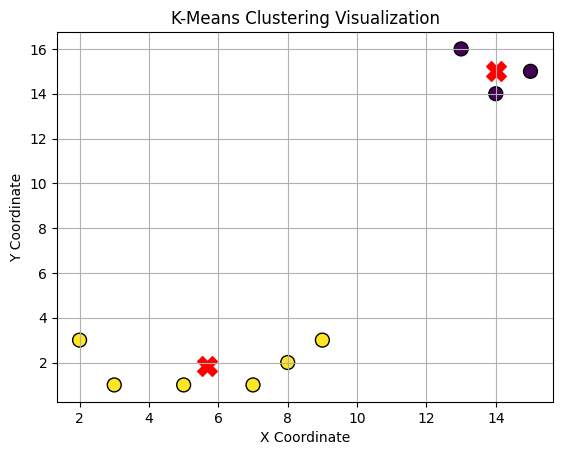

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Create a small dataset with 2D points
data = np.array([[3, 1], [5, 1], [2, 3], 
                 [8, 2], [9, 3], [7, 1], 
                 [15, 15], [13, 16], [14, 14]])

# Set the number of clusters to 2 as an example for beginners.
num_clusters = 2

# Create the KMeans instance with n_init specified and fit it to the data
kmeans = KMeans(n_clusters=num_clusters, n_init=10)
kmeans.fit(data)

# Retrieve the labels for each point and the final centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Complete the visualization by representing data points with their labels, centroids with red color and size 50, and labeling axes and title.
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', s=100, edgecolors='k')  # Plotting data points with cluster coloring
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X')  # Plotting centroids

# Labeling axes and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('K-Means Clustering Visualization')
plt.grid(True)

# Show the plot
plt.show()


Now it's time to make the algorithm zoom! Add the code to fit the KMeans model to the data, and calculate the labels and centroids after ten iterations. Remember, you're not just clustering stars in the cosmos but also data points on the chart!


```py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data preparation
np.random.seed(0)
x1 = np.random.normal(loc=5, scale=1, size=(100, 2))
x2 = np.random.normal(loc=10, scale=2, size=(100, 2))
x = np.concatenate([x1, x2])

# K-means clustering preparation
k = 3

def calc_distance(x1, x2):
    return (sum((x1 - x2)**2))**0.5

def find_closest_centroids(centroids, x):
    assigned_centroid = []
    for i in x:
        distance = []
        for j in centroids:
            distance.append(calc_distance(i, j))
        assigned_centroid.append(np.argmin(distance))
    return assigned_centroid

def calc_centroids(clusters, x):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(x), pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    for c in set(new_df['cluster']):
        current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

# K-means clustering function
def kmeans_clustering(x, initial_centroids):
    centroids = initial_centroids
    for i in range(10):
        get_centroids = find_closest_centroids(centroids, x)
        centroids = calc_centroids(get_centroids, x)
    return centroids, get_centroids

# Setting up the plot for three different initialization visualizations
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# TODO: Perform K-means clustering for three different sets of initial centroids
for i in range(3):
    # TODO: Create different initial_centroids and perform clustering
    axs[i].scatter(x[:,0], x[:,1], c=assigned_centroids, cmap='viridis')
    axs[i].scatter(np.array(final_centroids)[:,0], np.array(final_centroids)[:,1], c='red', marker='X', label='Centroids')
    axs[i].set_title(f"Initialization {i+1}")
    axs[i].set_xlabel("Feature 1")
    axs[i].set_ylabel("Feature 2")
    axs[i].legend()

plt.show()


```

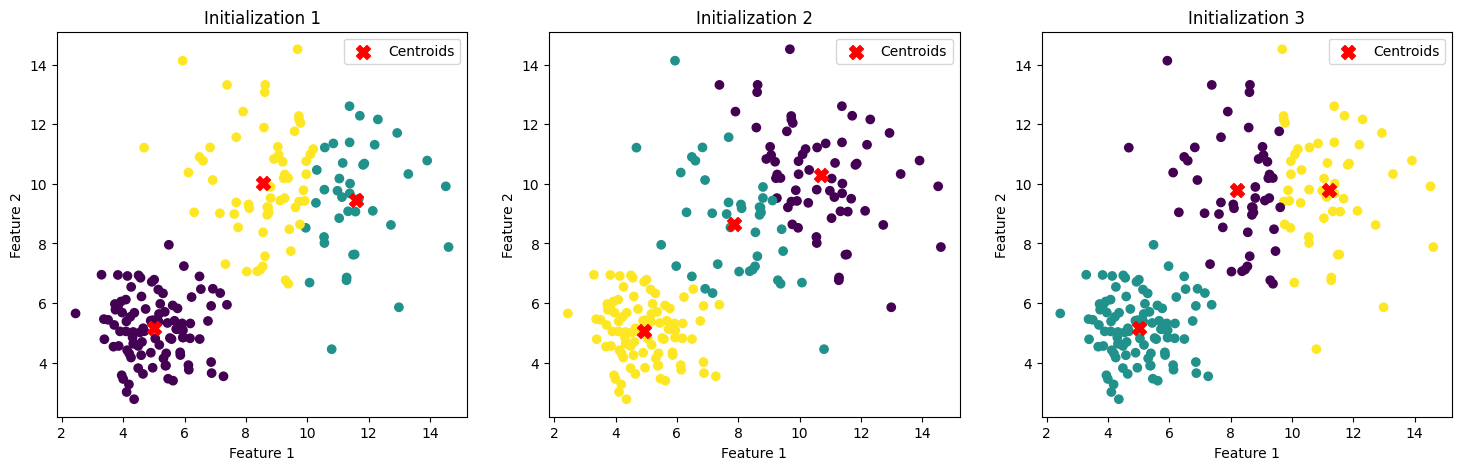

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data preparation
np.random.seed(0)
x1 = np.random.normal(loc=5, scale=1, size=(100, 2))
x2 = np.random.normal(loc=10, scale=2, size=(100, 2))
x = np.concatenate([x1, x2])

# K-means clustering preparation
k = 3

def calc_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def find_closest_centroids(centroids, x):
    assigned_centroid = []
    for i in x:
        distance = [calc_distance(i, centroid) for centroid in centroids]
        assigned_centroid.append(np.argmin(distance))
    return assigned_centroid

def calc_centroids(clusters, x):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(x), pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    for c in set(new_df['cluster']):
        current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

def kmeans_clustering(x, initial_centroids):
    centroids = initial_centroids
    for i in range(10):
        assigned_centroids = find_closest_centroids(centroids, x)
        centroids = calc_centroids(assigned_centroids, x)
    return centroids, assigned_centroids

# Setting up the plot for three different initialization visualizations
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i in range(3):
    # Create different initial_centroids and perform clustering
    np.random.seed(i)  # Different seed for each initialization
    initial_centroids = x[np.random.choice(x.shape[0], k, replace=False), :]
    final_centroids, assigned_centroids = kmeans_clustering(x, initial_centroids)
    
    # Plotting
    axs[i].scatter(x[:,0], x[:,1], c=assigned_centroids, cmap='viridis')
    axs[i].scatter(np.array(final_centroids)[:,0], np.array(final_centroids)[:,1], c='red', marker='X', s=100, label='Centroids')
    axs[i].set_title(f"Initialization {i+1}")
    axs[i].set_xlabel("Feature 1")
    axs[i].set_ylabel("Feature 2")
    axs[i].legend()

plt.show()
